In [ ]:
/**
游标，是一个指针，定位到结果集中的某一行
1.静态游标(Static) 数据变化，游标不变
2.动态游标(Dynamic) 数据变化游标数据变化
3.键集驱动游标(KeySet) 数据变化，游标部分数据发生变化
**/


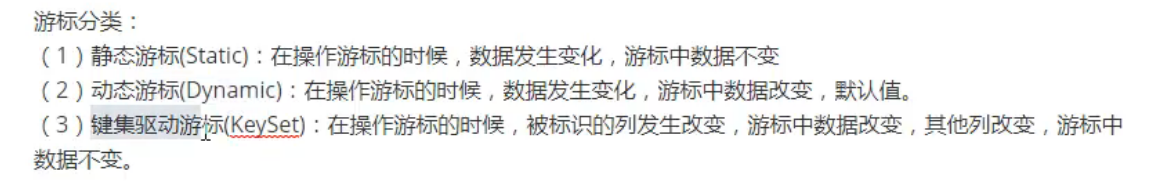

In [ ]:
--创建游标(scroll:表示滚动游标，可选)
/*如果没有scroll，游标是只进的，不能回滚 */
declare mycur cursor scroll
for select MemberAccount from Member

--游标打开
open mycur
--提取某一行的数据
fetch first from mycur --提取第一行
fetch last from mycur  --提取最后一行
fetch absolute 2 from mycur --提取绝对第二行
fetch relative 2 from mycur --提取相对第二行，当前下移2行
fetch next from mycur  --下移一行
fetch prior from mycur --上移一行

--提取游标数据存入变量，进行查询所有列信息
declare @acc varcahr(20)
fetch absolute 2 from mycur into @acc
select * from Member where MemberAccount = @acc

--遍历游标
declare @acc varchar(20) 
fetch absolute 1 from mycur into @acc --绝对位置第一条记录
--@@fetch_status:0提取成功，-1失败，-2提取内容不存在
while @@fetch_status = 0
    begin 
        print '提取成功'+ @acc 
        fetch next from mycur into @acc 
    end

--关闭游标,关闭后可以再一次打开
close mycur
--删除游标
deallocate mycur

--利用游标进行数据的修改和删除
select * from Member
fecth absolute 2 from mycur
update Member set MemberPwd = '654321' where current of mycur
/*这里的where 后面用游标来代替之前的a=b*/

fetch absolute 2 from mycur
delete from Member where current of mycur

--如果要遍历出每一行数据，就要定义游标指向结果集的多列数据
declare  mycur cursor scroll
for select MemberAccount,MemberPwd,MemberNickName from Member

open mycur
--先定义三个变量，存储三列数据
declare @acc  varchar(20)
declare @pwd varchar(20)
declare @nickname varchar(20)
fetch absolute 1 from mycur into @acc,@pwd,@nickname
while @@fetch_status =0
    begin 
        print '用户名:'+@acc+'密码：'+@pwd + '昵称：'+@nickname
        fetch next from mycur into @acc
    end
close mycur

In [ ]:

declare @abc int
while (1=1)
begin 
	update studentgrade set grade = 
	case 
		when grade <60 then grade +1
		else grade
	end
	select @abc = min(grade) from studentgrade 
	if @abc>50
		break
end